In [1]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne


In [14]:
# load raw
subject_id = 1
before_or_after = 'before'
raw_path = os.path.join('..', '..', 'data', str(subject_id), 'raw_' + before_or_after + '.fif')
raw = mne.io.read_raw_fif(raw_path, preload=True)
raw.plot()

Opening raw data file ..\..\data\1\raw_before.fif...
    Range : 0 ... 647763 =      0.000 ...   539.803 secs
Ready.
Reading 0 ... 647763  =      0.000 ...   539.803 secs...


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_12584\1513425226.py:5: RuntimeWarning: This filename (..\..\data\1\raw_before.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


Channels marked as bad:
none


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3961 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting ICA to data using 32 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.2s finished


Selecting by number: 20 components
Fitting ICA took 22.0s.


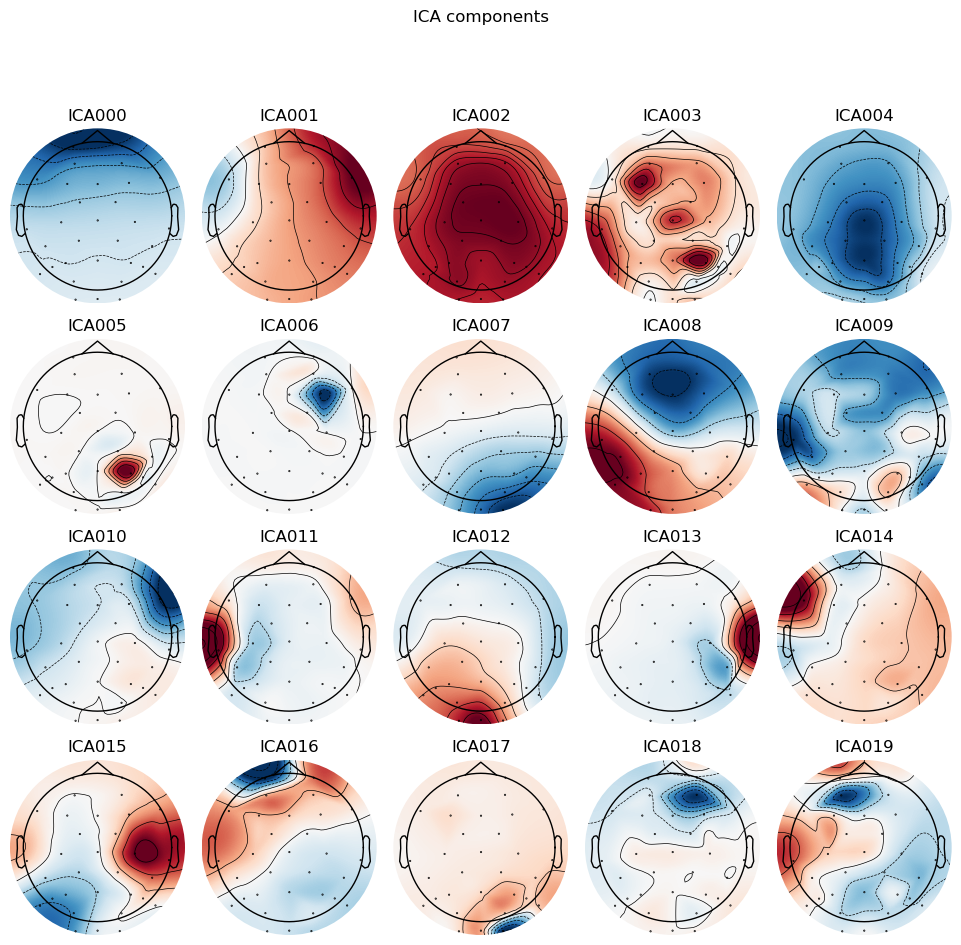

[<MNEFigure size 975x967 with 20 Axes>]

In [16]:
# ica
raw_filtered = raw.copy().filter(l_freq=1, h_freq=None)
n_components = 20  # Number of ICA components (adjust as needed)
ica = mne.preprocessing.ICA(n_components=n_components, random_state=97, method='picard')
ica.fit(raw_filtered)
ica.plot_components()

In [17]:
n_rows = 3
n_cols = 3

for start_idx in range(0, n_components, n_rows * n_cols):
    end_idx = min(start_idx + n_rows * n_cols, 25)
    ica.plot_properties(raw, picks=list(range(start_idx, end_idx)), axes_layout=(n_rows, n_cols))

TypeError: ICA.plot_properties() got an unexpected keyword argument 'layout'

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 1 ICA component
    Projecting back using 32 PCA components


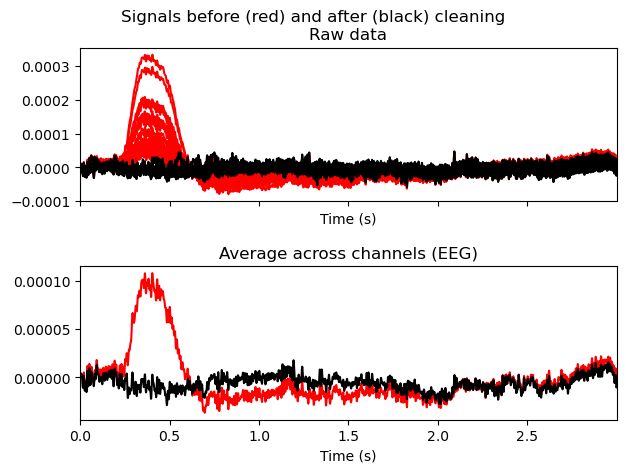

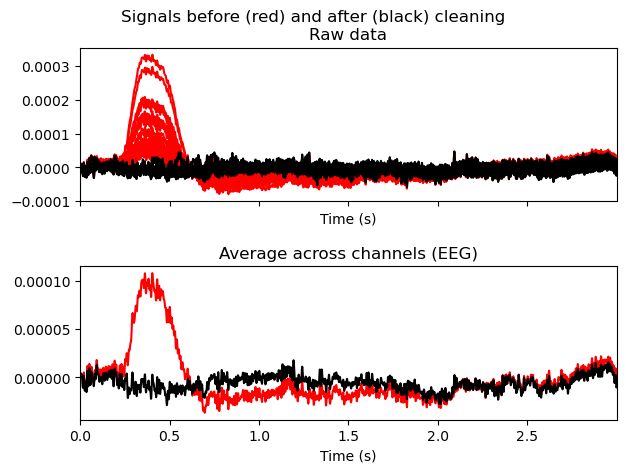

In [15]:
# plot overlay
ica.plot_overlay(raw, exclude=[0], picks='eeg')


In [5]:
ica.exclude = [0, 2, 5]  # Replace with the indices of the components you want to exclude
raw_ica_applied = raw.copy()
ica.apply(raw_ica_applied)
raw.plot()
raw_ica_applied.plot()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 3 ICA components
    Projecting back using 32 PCA components


Channels marked as bad:
none
Channels marked as bad:
none
